In [ ]:
%pip install opencv-contrib-python

In [1]:
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow

In [2]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

60000 60000 10000 10000


In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu", input_shape=[28, 28, 1]),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=32, activation="relu"),
  tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 120s 63ms/step - loss: 0.5749 - acc: 0.8389 - val_loss: 0.1016 - val_acc: 0.9750
Epoch 2/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2306 - acc: 0.9478 - val_loss: 0.1095 - val_acc: 0.9759
Epoch 3/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2270 - acc: 0.9523 - val_loss: 0.1359 - val_acc: 0.9694
Epoch 4/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2575 - acc: 0.9489 - val_loss: 0.1326 - val_acc: 0.9710
Epoch 5/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.2656 - acc: 0.9467 - val_loss: 0.1344 - val_acc: 0.9680


In [ ]:

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
y_test = np.array(y_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       980
           1       0.99      0.96      0.98      1135
           2       0.92      0.99      0.95      1032
           3       0.99      0.94      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.92      0.97      0.95       892
           6       0.98      0.97      0.97       958
           7       0.98      0.89      0.93      1028
           8       0.84      0.96      0.90       974
           9       0.96      0.90      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
x_train[0].shape

(28, 28)

In [7]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
img = cv.imread("/content/gdrive/MyDrive/Hand Writing Photo/My Handwriting 1.jpeg")

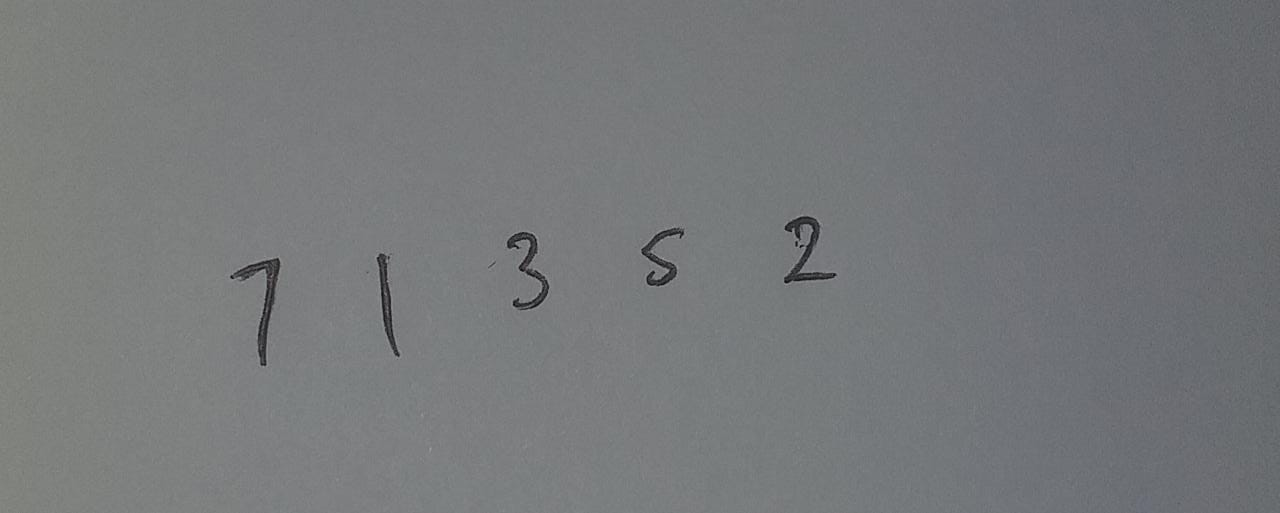

In [9]:
cv2_imshow(img)

In [10]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray,(7,7),0)

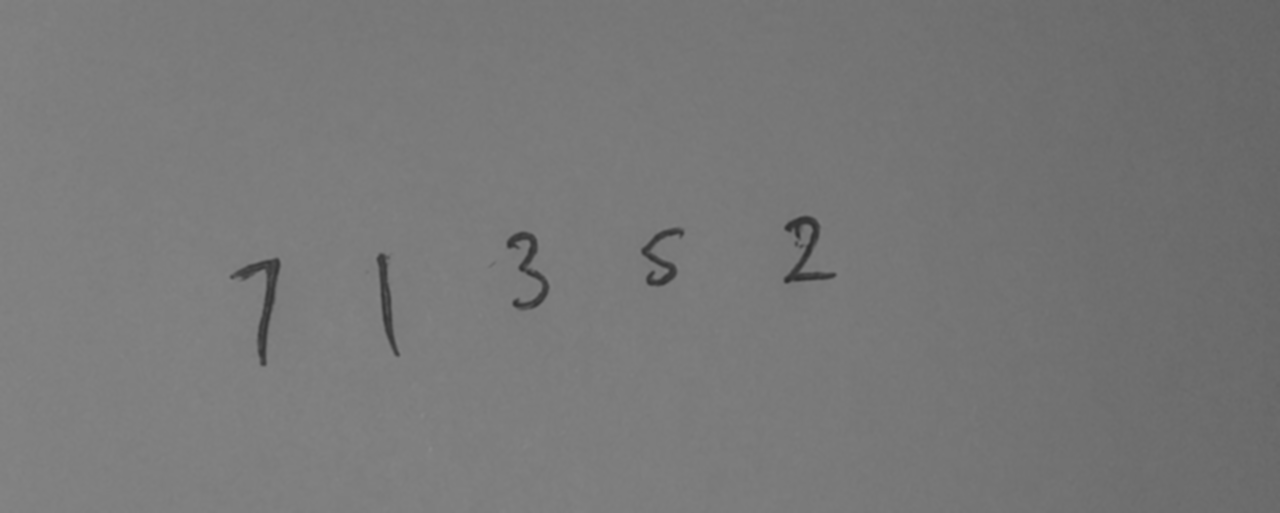

In [11]:
cv2_imshow(img_blur)

In [12]:
img_bin = cv.adaptiveThreshold(img_blur, 255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 21, 10)

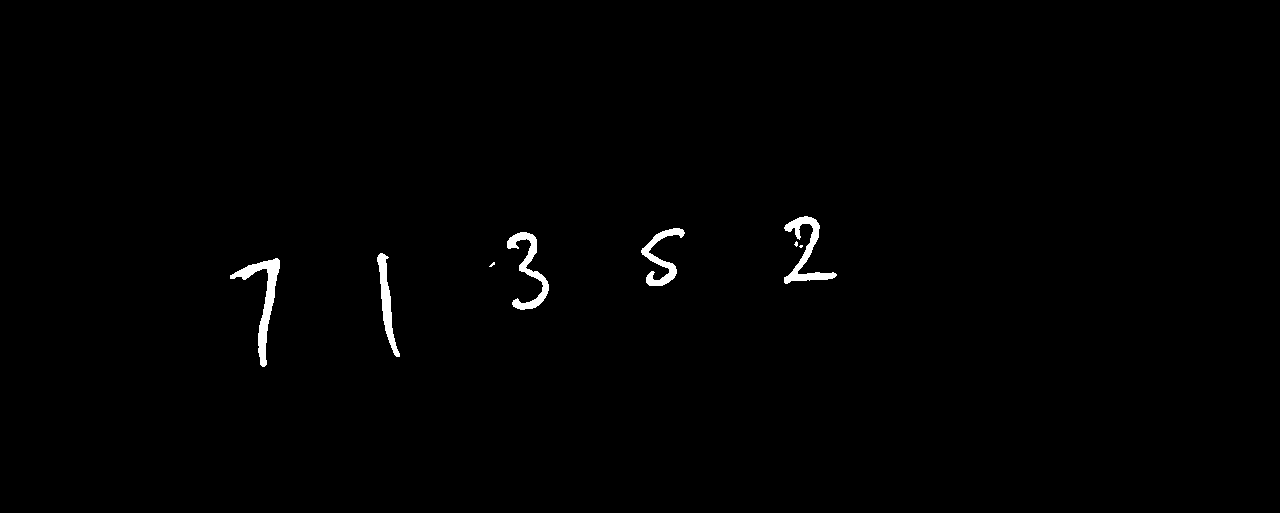

In [13]:
cv2_imshow(img_bin)

In [14]:
se=cv.getStructuringElement(cv.MORPH_RECT , (3,3))
img_open = cv.morphologyEx(img_bin, cv.MORPH_OPEN, se)

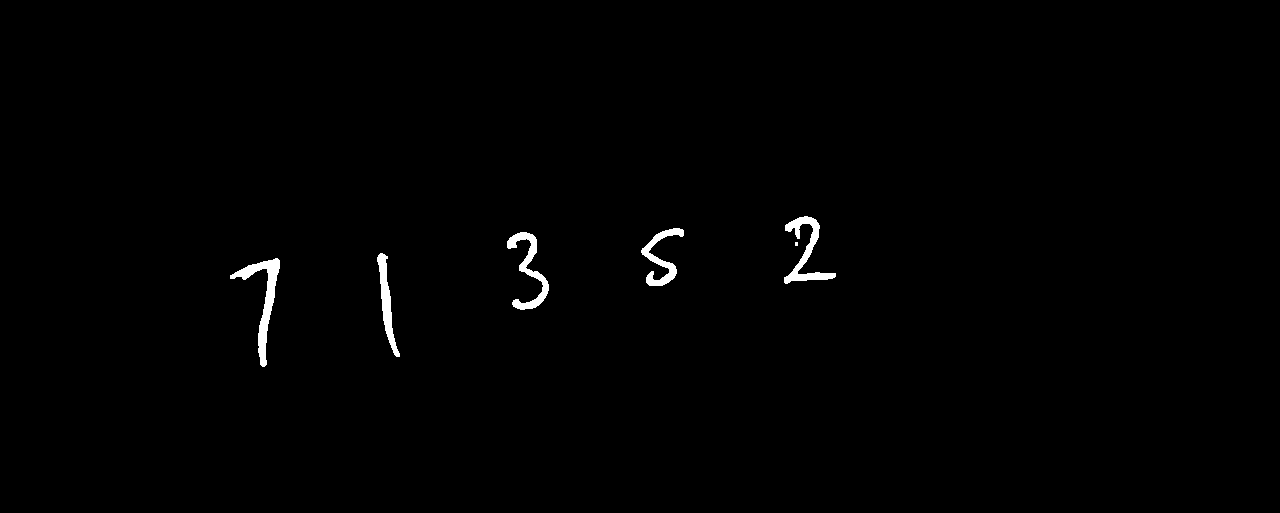

In [ ]:
cv2_imshow(img_open)

In [16]:
contours, _ = cv.findContours(img_open.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

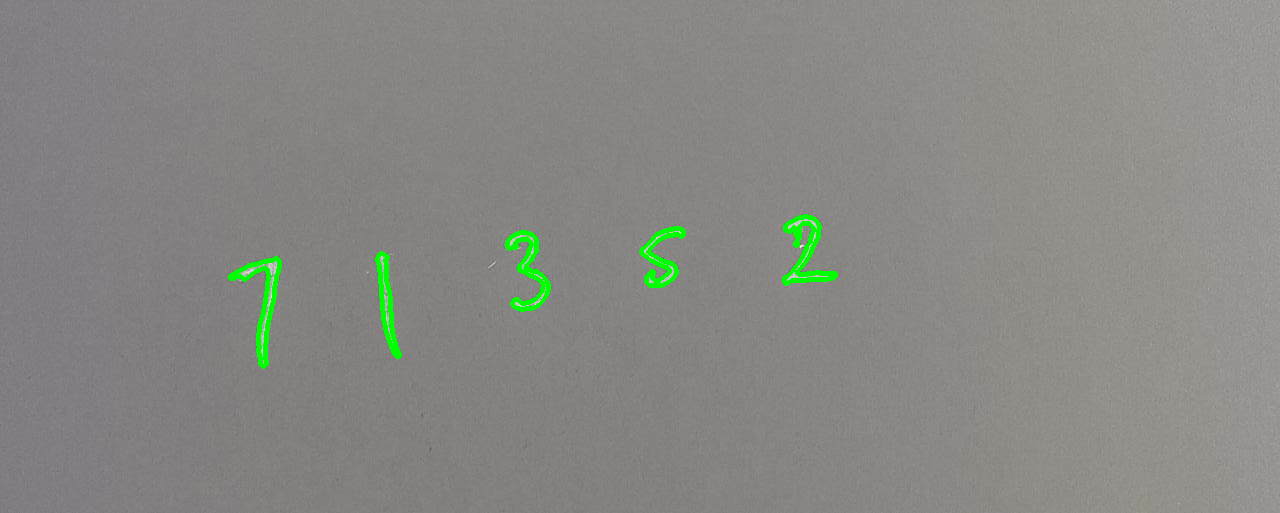

In [17]:
img_contours_container = img.copy()
cv2_imshow(cv.drawContours(img_contours_container, contours, -1, (0,255,0), 3))

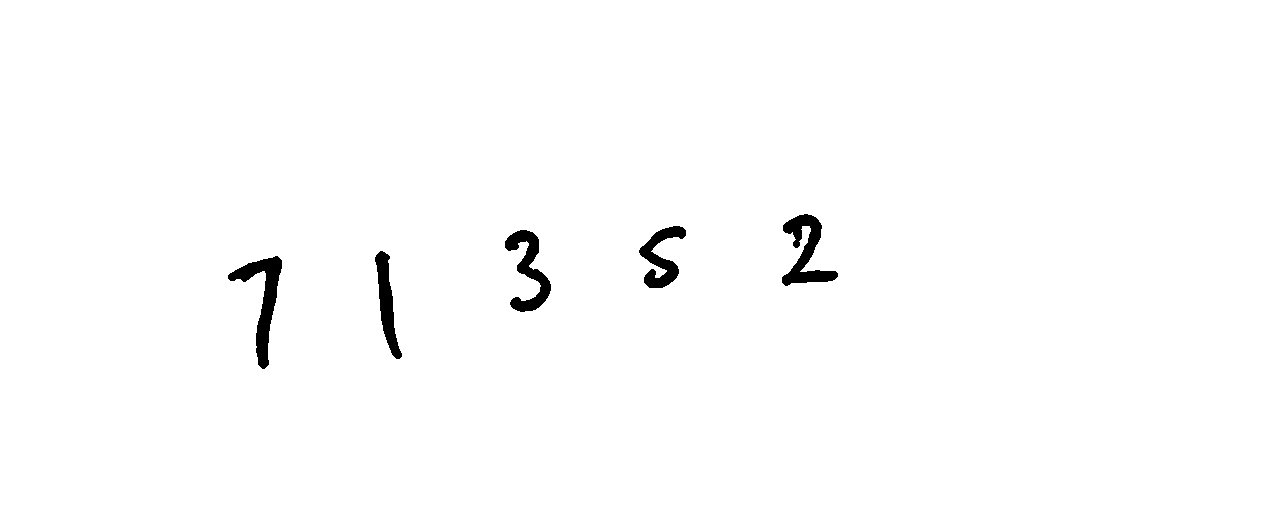

In [ ]:
cv2_imshow(img_contours_container)

In [19]:
# x,y,w,h = cv.boundingRect(contours)
idx =0
pos_infos = []
for cnt in contours:
    idx += 1
    x,y,w,h = cv.boundingRect(cnt)
    if w * h >= 500:
      print("euy")
      roi=~img_open[y:y+h,x:x+w].copy()
      pos_infos.append([x, y, w, h])
      cv.imwrite( "content/gdrive/MyDrive/Hand Writing Photo/bounding_" + str(idx) + '.jpg', roi)
print(pos_infos)

euy
euy
euy
euy
euy
[[230, 258, 50, 109], [377, 253, 23, 104], [507, 232, 42, 78], [641, 228, 43, 58], [784, 216, 52, 68]]


In [ ]:
ws = []
hs = []
for i in pos_infos:
  ws.append(i[2])
  hs.append(i[3])


max_w, max_h = np.max(ws), np.max(hs)
x_offset = 20
y_offset = 20
process_images = []
rects = []
for x, y, w, h in pos_infos:
    center_x = x + w//2
    center_y = y + h//2
    topleft_x = center_x - max_w//2 - x_offset
    topleft_y = center_y - max_h//2 - y_offset
    bottomright_x = topleft_x + max_w + x_offset + x_offset
    bottomright_y = topleft_y + max_h + y_offset + y_offset
    process_images.append(cv.resize(img_open[topleft_y:bottomright_y,topleft_x:bottomright_x].copy(), (28,28)))
    rects.append([topleft_x, topleft_y, bottomright_x, bottomright_y])

process_images = np.array(process_images)

In [ ]:
y_pred = model.predict(process_images.reshape(-1, 28, 28, 1))
y_class = np.argmax(y_pred,axis = 1) 

In [ ]:
print(y_class)

[7 1 3 5 2]


In [ ]:
cv2_imshow(process_images[0])

In [ ]:
print(rects)

[[209, 238, 301, 387], [342, 231, 434, 380], [482, 197, 574, 346], [616, 183, 708, 332], [764, 176, 856, 325]]


In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2
   
result = img.copy()
for idx, rect in enumerate(rects) :
  cv.rectangle(result, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 0), 2)
  cv.putText(result, str(y_true[idx]), (rect[0], rect[1]), font, fontScale, color, thickness, cv.LINE_AA)

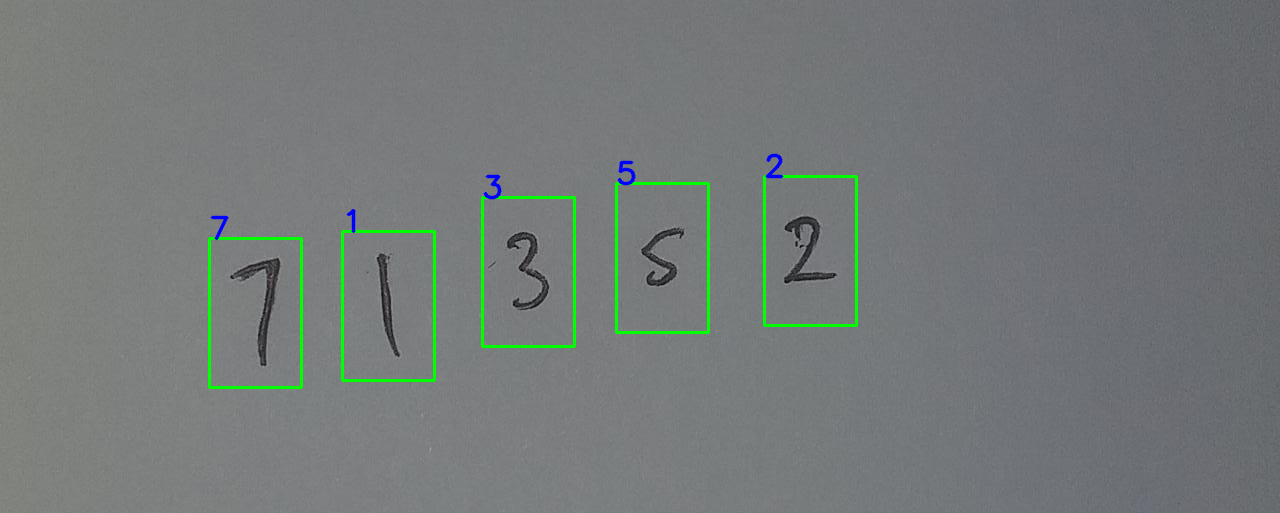

In [ ]:
cv2_imshow(result)

In [ ]:
model.save('gdrive/MyDrive/Hand Writing Photo/Model/CNN Model.h5')